In [1]:
import numpy as np
import matplotlib as mpl
import math
import matplotlib.pyplot as plt
import csv
import itertools as it

# Vonal objektum

In [2]:
def linegen_xfunc(m,y0):
    return lambda x: m*x+y0

class Line:
    def __init__(self, v, p0, vec='normal' ):
        if vec=='normal':
            self.t = [v[1], -v[0]]
            self.n = v
            self.p0 = p0
        elif vec=='tangent':
            self.t = v
            self.n = [-v[1], v[0]]
            self.p0 = p0
        else:
            print("unknown vector type!")
    
    @classmethod
    def create_from_w(cls,w):
        n = w
        p0 = [0,0]
        return Line(n,p0)

    def linegen_xfunc(self):
        if math.isclose(0., self.t[0]):
            print("The line is parallel to the y axis!")
            return
        return linegen_xfunc(self.t[1]/self.t[0], -self.p0[0]*self.t[1]/self.t[0]+self.p0[1])
    
    def drawline(self,xmin,xmax,n=100):
        line2draw=self.linegen_xfunc()
        xs=np.linspace(xmin,xmax,n)
        plt.plot(xs,line2draw(xs))

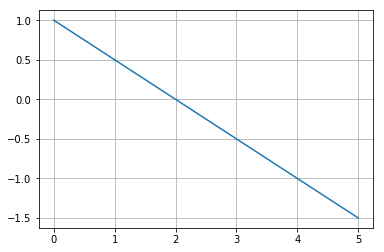

In [3]:
myline = Line([1.,-0.5],[0.,1.],'tangent')

myline.drawline(0.,5.,100)
plt.grid(True)
plt.show()

# Ismert érmék adatainak beolvasása

In [4]:
with open('coin_Known.csv', 'r') as csvfile:
    coinreader = csv.reader(csvfile)
    coins=[row for row in coinreader]
    
labeledData=[[float(cn[1]),float(cn[3]),1 if int(cn[0])==20 else -1] for cn in coins[1:]]

In [5]:
atlag=np.mean(labeledData,0)

In [6]:
line_modifier=[data-atlag for data in labeledData]

In [7]:
def datasorter(line_modifier):
    x1,y1=zip(*[data[0:2] for data in line_modifier if data[2]==1])
    x2,y2=zip(*[data[0:2] for data in line_modifier if data[2]==-1])
    return x1,y1,x2,y2

x1,y1,x2,y2 = datasorter(line_modifier)

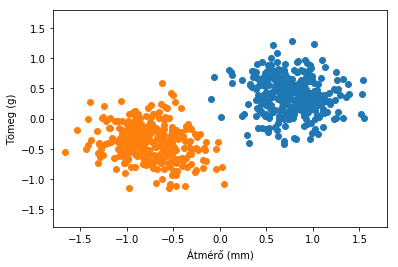

In [8]:
xs=(-1.8,1.8,100)
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.xlim(xs[0],xs[1]); plt.xlabel("Átmérő (mm)")
plt.ylim(xs[0],xs[1]); plt.ylabel("Tömeg (g)")
plt.show()

## Egyenes elkészítése

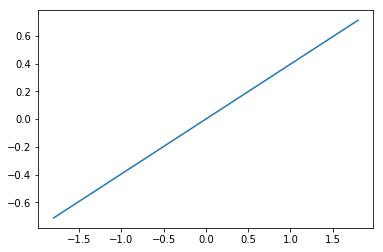

In [10]:
# w inicializálása
w=np.random.uniform(-1.,1.,2)
Line.create_from_w(w).drawline(*xs); plt.show()

In [11]:
# Tanítás
α=0.5
for run in range(1): # több futtatás, ha nem találja meg a vonalat 1-re
    np.random.shuffle(line_modifier) # Adatok megkeverése (újrakeverése) tanításhoz
    for di in line_modifier:
        xv = np.array(di[0:2])
        ɛ = di[2]-np.sign(np.dot(di[0:2],xv))
        w += α*ɛ*xv

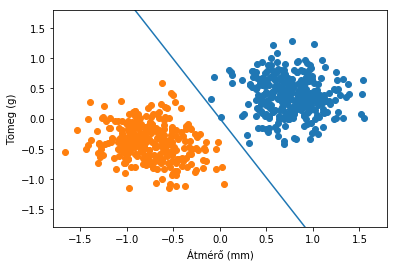

In [12]:
xs=(-1.8,1.8,100)
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.xlim(xs[0],xs[1]); plt.xlabel("Átmérő (mm)")
plt.ylim(xs[0],xs[1]); plt.ylabel("Tömeg (g)")
Line.create_from_w(w).drawline(*xs);
plt.show()

# Ismeretlen érmék osztályozása

In [13]:
with open('coin_Anonymus.csv', 'r') as csvfile:
    coinreader = csv.reader(csvfile)
    coins_to_label = [row for row in coinreader]
    coins_to_label = [[float(e) for e in row]-atlag[0:2] for row in coins_to_label[1:]]

In [14]:
# Ismeretlen érmék osztályozása
labeledData=[(*coin,int(np.sign(np.dot(w,coin))))for coin in coins_to_label]

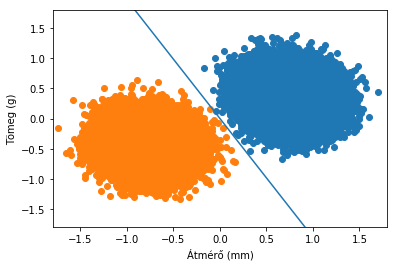

In [15]:
x10,y10,x20,y20=datasorter(labeledData)
plt.scatter(x10,y10)
plt.scatter(x20,y20)
plt.xlim(xs[0],xs[1]); plt.xlabel("Átmérő (mm)")
plt.ylim(xs[0],xs[1]); plt.ylabel("Tömeg (g)")
Line.create_from_w(w).drawline(*xs);
plt.show()

# Ellenőrzés

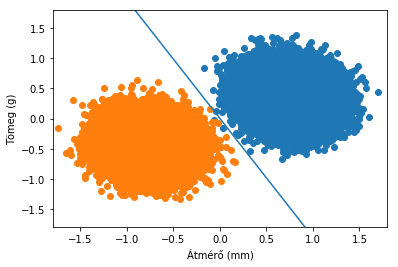

In [16]:
with open('coin_Anonymus_solution.csv', 'r') as csvfile:
    coinreader = csv.reader(csvfile)
    coins=[row for row in coinreader]
    
checkData=[[float(cn[1])-atlag[0],float(cn[3])-atlag[1],1 if int(cn[0])==20 else -1] for cn in coins[1:]]
x11,y11,x21,y21 = datasorter(checkData)
plt.scatter(x11,y11)
plt.scatter(x21,y21)
plt.xlim(xs[0],xs[1]); plt.xlabel("Átmérő (mm)")
plt.ylim(xs[0],xs[1]); plt.ylabel("Tömeg (g)")
Line.create_from_w(w).drawline(*xs);
plt.show()

# Gyakorló feladat

Készítsd el a tanulási folyamatot objektumként!

Az osztály struktúrájához ötlet (természetesen ettől nyugodtan el lehet térni):
```python
class coinLearner:
    def __init__(self):
        self.w=np.random.random(2) # perceptron inicializálása
        self.perceptron_taught = False # ellenőrzéshez, hogy nehogy véletlenül felülírjuk a megtanultakat
     
    def teachPerceptron(self,learning_data):
        if not self.perceptron_taught:
            ...
            self.perceptron_taught = True
        
    def reteachPerceptron(self,learning_data):
        self.perceptron_taught = False
        self.teachPerceptron(learning_data)
    
    def labeldata(self,data):
        return (*data,np.sign(np.dot(self.w,learning_data)))
    
    def labelalldata(self,all_data)
        return [self.labeldata(data) for data in all_data]```
        
Érdemes egy Line objektumot generáló függvényt is létrehozni, amellyel a megjelenítés egyszerűsíthető. Továbbá érdemes azokat a feladatokat, amelyeket többször is meg kell csinálni, függvényekbe rakni (akár az osztályon belülre).
    
A perceptronokról az alábbi honlapon olvashatsz részletesebben:  
http://project.mit.bme.hu/mi_almanach/books/neuralis/ch03s01